In [13]:
import pandas as pd
import os
import numpy as np

In [5]:
FoodSeg103_categories = pd.read_csv(r"D:\Projects\CDS\Capstone Project\FoodSeg103\category_id.txt", sep='\t', header=None)
FoodSeg103_categories.columns = ['id', 'ingr_name']
FoodSeg103_categories

,id,ingr_name
0,0,background
1,1,candy
2,2,egg tart
3,3,french fries
4,4,chocolate
...,...,...
99,99,enoki mushroom
100,100,oyster mushroom
101,101,white button mushroom
102,102,salad


In [7]:
save_path = r'E:\My Drive\Nutrition5kDataset'
ingredients = pd.read_excel(os.path.join(save_path, 'ingredients.xlsx'))
ingredients

,ingr,id,cal/g,fat(g),carb(g),protein(g)
0,cottage cheese,1,0.980,0.043,0.034,0.110
1,strawberries,2,0.330,0.003,0.080,0.007
2,garden salad,3,0.646,0.034,0.032,0.061
3,bacon,4,5.410,0.420,0.014,0.370
4,potatoes,5,0.770,0.001,0.170,0.020
...,...,...,...,...,...,...
550,pizza sauce,551,0.290,0.002,0.070,0.013
551,pomegranate,552,0.830,0.012,0.190,0.017
552,nut cheese,553,2.100,0.101,0.040,0.256
553,soy sausage,554,2.020,0.144,0.063,0.160


In [11]:
foodseg103_ingredients = set(FoodSeg103_categories['ingr_name'].unique())
nutrition5k_ingredients = set(ingredients['ingr'].unique())

In [14]:
len(foodseg103_ingredients - nutrition5k_ingredients), np.array(foodseg103_ingredients - nutrition5k_ingredients)

(59,
 array({'background', 'fried meat', 'sauce', 'cheese butter', 'walnut', 'cashew', 'pie', 'dried cranberries', 'tomato', 'French beans', 'peanut', 'cherry', 'fig', ' hanamaki baozi', 'hamburg', 'king oyster mushroom', 'celery stick', 'apricot', 'other ingredients', 'blueberry', 'rape', 'shellfish', 'soup', 'cucumber', 'raspberry', 'egg', 'enoki mushroom', 'candy', 'egg tart', 'bamboo shoots', 'red beans', 'white button mushroom', 'ice cream', 'grape', 'spring onion', 'chicken duck', 'almond', 'oyster mushroom', 'melon', 'salad', 'biscuit', 'pumpkin', 'date', 'white radish', ' cabbage', 'pudding', 'pear', 'wonton dumplings', 'soy', 'potato', 'shiitake', 'cake', 'mango', 'cilantro mint', 'milkshake', 'strawberry', 'juice', 'onion', 'kelp'},
       dtype=object))

In [15]:
len(nutrition5k_ingredients - foodseg103_ingredients), np.array(nutrition5k_ingredients - foodseg103_ingredients)

(507,
 array({'sherbet', 'baked beans', 'pesto', 'coconut milk', 'veal', 'cheesecake', 'potato salad', 'shallots', 'orange with peel', 'plate only', 'granola bars', 'apple pie', 'oregano', 'soy yogurt', 'cream cheese', 'octopus', 'french dressing', 'meatballs', 'eggs', 'edamame', 'cobbler', 'beets', 'thyme', 'gelatin', 'corn on the cob', 'pears', 'rice cakes', 'raisin bran', 'pepperoni', 'chayote squash', 'french toast', 'tortellini', 'risotto', 'pepperoni pizza', 'carrot cake', 'white wine', 'turnover', 'brown rice', 'baked potatoes', 'artichokes', 'cheese pizza', 'celery root', 'smoked salmon', 'salads', 'coleslaw', 'english muffins', 'salad dressing', 'corn nuts', 'mashed potatoes', 'raspberries', 'bean(seed) ', 'catfish', 'energy drinks', 'pizza dough', 'chicken nuggets', 'biscuits', 'white bread', 'wild rice', 'bacon', 'turkey breast', 'tahini', 'arugula', 'chips', 'brazil nuts', 'chimichangas', 'nectar', 'applesauce', 'brown sugar', 'taco shells', 'brownies', 'jicama', 'cakes', '

In [18]:
import re
from difflib import get_close_matches

def normalize(name):
    return re.sub(r'[^a-z]', '', name.lower())

norm_nutrition = {normalize(x): x for x in nutrition5k_ingredients}
norm_foodseg = {normalize(x): x for x in foodseg103_ingredients}

mapping = {}
for fs_norm, fs_orig in norm_foodseg.items():
    match = get_close_matches(fs_norm, norm_nutrition.keys(), n=1, cutoff=0.8)
    if match:
        mapping[fs_orig] = norm_nutrition[match[0]]
    else:
        mapping[fs_orig] = None

In [19]:
mapping

{'background': None,
 'pork': 'pork',
 'asparagus': 'asparagus',
 'lettuce': 'lettuce',
 'pie': 'pies',
 'celery stick': None,
 'apricot': 'apricots',
 'shellfish': None,
 'snow peas': 'snow peas',
 'corn': 'corn',
 'egg tart': None,
 'red beans': 'refried beans',
 'chicken duck': None,
 'olives': 'olives',
 'tofu': 'tofu',
 'oyster mushroom': None,
 'salad': 'salads',
 'soy': None,
 'milkshake': 'milk shakes',
 'bean sprouts': 'bean sprouts',
 'peach': 'peach',
 'kiwi': 'kiwi',
 'sauce': None,
 'French beans': None,
 'pasta': 'pasta',
 'fig': 'figs',
 ' hanamaki baozi': None,
 'hamburg': 'hamburgers',
 'carrot': 'carrot',
 'apple': 'apple',
 'enoki mushroom': None,
 'candy': None,
 'white button mushroom': None,
 'ice cream': 'ice creams',
 'steak': 'steak',
 'seaweed': 'seaweed',
 'popcorn': 'popcorn',
 'almond': 'almonds',
 'green beans': 'green beans',
 'broccoli': 'broccoli',
 'melon': None,
 'date': 'dates',
 'banana': 'banana',
 'white radish': None,
 'pear': 'pears',
 'wonton d

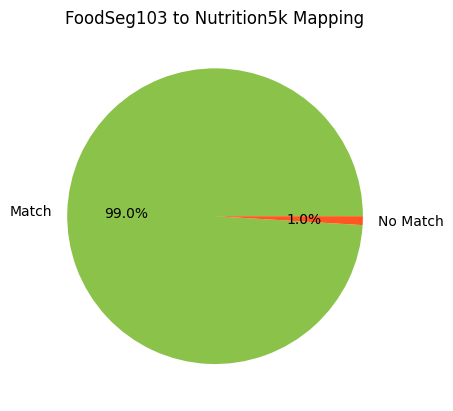

In [22]:
from difflib import get_close_matches
import pandas as pd
import matplotlib.pyplot as plt

rows = []
for fs_norm, fs_orig in norm_foodseg.items():
    matches = get_close_matches(fs_norm, norm_nutrition.keys(), n=3, cutoff=0.5)
    best_match = matches[0] if matches else None
    rows.append({
        'FoodSeg103_ingredient': fs_orig,
        'Closest_match_1': norm_nutrition[matches[0]] if len(matches) > 0 else None,
        'Closest_match_2': norm_nutrition[matches[1]] if len(matches) > 1 else None,
        'Closest_match_3': norm_nutrition[matches[2]] if len(matches) > 2 else None,
        'Match_found': bool(matches)
    })

df_matches = pd.DataFrame(rows)

counts = df_matches['Match_found'].value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['Match', 'No Match'], colors=['#8BC34A','#FF5722'])
plt.title("FoodSeg103 to Nutrition5k Mapping")
plt.ylabel('')
plt.show()
